<h1><big><center>OpenClassroom - Parcours Data Analyst </center></big></h1>

<h3><big><center>Akram SASSI</center></big></h3>


<h2><big><center> Projet 3 - Etudes de santé publique </center></big></h2>


</br>

<p align="center"></p>

<h3><big><center>Lien de la soutenance</center></big></h3>

<h3><big><center>https://www.youtube.com/watch?v=7JHMexrGrpQ</center></big></h3>

# Sommaire
***

* [1. Partie Python](#partie1)
   * [1.1. Analyse de l'évolution de la population mondiale](#q1)
   * [1.2. Production et informations sur la disponibilité alimentaire](#q2-q9)
   * [1.3. Chiffres sur la sous-nutrition](#sousnutri) 
   * [1.4. Exemples d'utilisation perfectible de ressources alimentaires](#q13-q14)
   
  
* [2. Partie SQL](#partie2)
    * [2.1. Création des tables SQL](#tables)
    * [2.2. Implémentation et test des requêtes SQL](#requetes)


* [Sources et solutions techniques utilisées](#sources)

# I. Partie Python 
<a id="partie1"></a>
*** 
Dans cette première partie (q1-q14), nous répondons à plusieurs questions en manipulant des tables de données sur python. Commençons donc par charger les bibliothèques dont nous aurons besoin.

In [2]:
import numpy as np
import pandas as pd
import math

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#Constantes utiles
POPULATION_TOTALE = 7213211612
AUGMENTATION_ANNEE= 84206107.75
jours_en_année=365

# QUESTION 1 : 
<a id="q1"></a>
### Calcul de la population totale (2013 et 2017)
***

Nous commençons par charger les fichiers csv contenant les informations sur les population pour les années correspondantes 

In [2]:
population_totale_2013 = pd.read_csv("population totale monde 2013.csv")
population_totale_2017 = pd.read_csv("population totale monde 2017.csv")

In [3]:
population_totale_2013.head()

Code Domaine                       Domaine  Code zone            Zone  \
0           OA  Séries temporelles annuelles          2     Afghanistan   
1           OA  Séries temporelles annuelles        202  Afrique du Sud   
2           OA  Séries temporelles annuelles          3         Albanie   
3           OA  Séries temporelles annuelles          4         Algérie   
4           OA  Séries temporelles annuelles         79       Allemagne   

   Code Élément            Élément  Code Produit                 Produit  \
0           511  Population totale          3010  Population-Estimations   
1           511  Population totale          3010  Population-Estimations   
2           511  Population totale          3010  Population-Estimations   
3           511  Population totale          3010  Population-Estimations   
4           511  Population totale          3010  Population-Estimations   

   Code année  Année           Unité     Valeur Symbole  \
0        2013   2013  1000 personnes  31731.688       X   
1        2013   2013  1000 personnes  53767.396       X   
2        2013   2013  1000 personnes   2918.978       X   
3        2013   2013  1000 personnes  38338.562       X   
4        2013   2013  1000 personnes  81265.139       X   

          Description du Symbole  \
0  Sources internationales sûres   
1  Sources internationales sûres   
2  Sources internationales sûres   
3  Sources internationales sûres   
4  Sources internationales sûres   

                                                Note  
0  UNDESA, Population Division – World Population...  
1  UNDESA, Population Division – World Population...  
2  UNDESA, Population Division – World Population...  
3  UNDESA, Population Division – World Population...  
4  UNDESA, Population Division – World Population...

Enlevons les colonnes dont inutiles pour alléger le notebook.

In [4]:
TOTALE = population_totale_2013.drop(columns=["Code Domaine","Code zone","Code Élément","Élément",\
                                              "Code Produit","Produit","Code année","Symbole",\
                                              "Description du Symbole","Note","Domaine",'Unité'])

TOTALE_2 = population_totale_2017.drop(columns=["Code Domaine","Code zone","Code Élément",\
                                              "Élément","Code Produit","Produit","Code année",\
                                              "Symbole","Description du Symbole","Note","Domaine",'Unité'])

TOTALE.columns=["Zone","Année 2013","Valeur 2013"]
TOTALE_2.columns=["Zone","Année 2017","Valeur 2017"]


totale_finale=pd.merge(TOTALE, TOTALE_2, on="Zone" , how="inner")
totale_finale.head()

Zone  Année 2013  Valeur 2013  Année 2017  Valeur 2017
0     Afghanistan        2013    31731.688        2017    35530.081
1  Afrique du Sud        2013    53767.396        2017    56717.156
2         Albanie        2013     2918.978        2017     2930.187
3         Algérie        2013    38338.562        2017    41318.142
4       Allemagne        2013    81265.139        2017    82114.224

Calculons maintenant la population mondiale pour les années 2013 et 2017.

In [5]:
print(" Voici la Population totale en 2013:" , (1000*totale_finale["Valeur 2013"].sum()/10**9))
print(" Voici la Population totale en 2017:" , (1000*totale_finale["Valeur 2017"].sum()/10**9))
print(" Nous pouvons rajouter que la population mondiale augmente chaque année de" ,(int(1000*totale_finale["Valeur 2017"].sum()) - int(1000*totale_finale["Valeur 2013"].sum()))/4,"habitants.")

 Voici la Population totale en 2013: 7.213211612
 Voici la Population totale en 2017: 7.550036043999999
 Nous pouvons rajouter que la population mondiale augmente chaque année de 84206107.75 habitants.


## Allons plus loin ... 

**1) Estimation de la population en 2050**

**2) Détectons les pays avec la plus grande croissance démographique** $\frac{pop_{n+1} – pop_n}{pop_n}$



In [7]:
evolution_pop=pd.read_csv("pop_00_17.csv")
evolution_pop_total=evolution_pop[evolution_pop['Élément']=='Population totale']

pop_totale = evolution_pop_total.groupby("Année")["Valeur"].sum().reset_index().rename(columns={"Valeur":"Population_Totale"})
pop_totale["Population_totale en milliards"]=pop_totale["Population_Totale"]*1000
pop_totale=pop_totale[["Année","Population_totale en milliards"]]
pop_totale.head()

Année  Population_totale en milliards
0   2000                    6.145007e+09
1   2001                    6.223412e+09
2   2002                    6.302150e+09
3   2003                    6.381409e+09
4   2004                    6.461371e+09

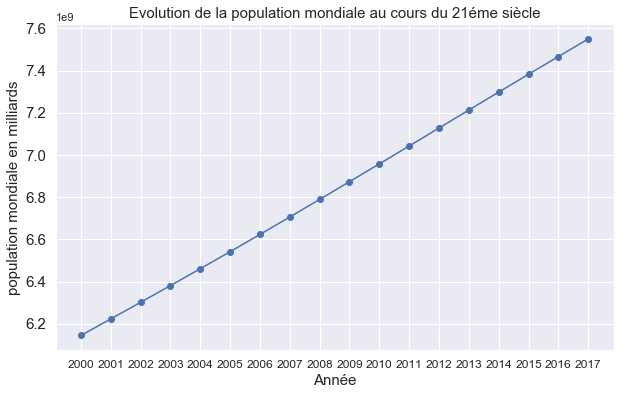

In [8]:
values_x = pop_totale["Année"].values
values_y = pop_totale["Population_totale en milliards"].values

plt.figure(figsize=(10,6))
plt.xticks(values_x)
plt.plot(values_x,values_y, marker='o')
plt.grid(axis='y', linestyle='-')
plt.title('Evolution de la population mondiale au cours du 21éme siècle',fontsize = 15)
plt.xlabel('Année',fontsize = 15)
plt.ylabel('population mondiale en milliards',fontsize = 15)
plt.gca().yaxis.set_tick_params(labelsize = 15)
plt.gca().xaxis.set_tick_params(labelsize = 12)
plt.show()

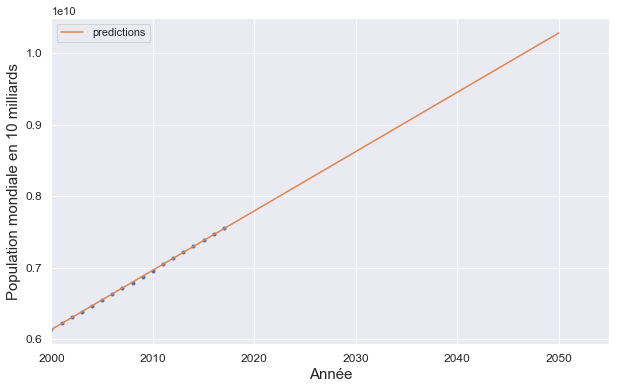

In [9]:
z= np.polyfit(values_x, values_y, 1)
#polyfit : elle colle un polynome de degré "t" ici 1 (pour avoir ax+b) sur les points (x,y).

polynome_pop = np.poly1d(z)
#poly1d : crée la fonction polynomiale ax+B à partir des "a" et "b" trouvés par polyfit

plt.figure(figsize=(10,6))
xp = np.linspace(2000,2050,100)
plt.xlabel('Année',fontsize = 15)
plt.ylabel('Population mondiale en 10 milliards',fontsize = 15)
plt.gca().yaxis.set_tick_params(labelsize = 12)
plt.gca().xaxis.set_tick_params(labelsize = 12)
plt.plot(values_x, values_y, '.')
plt.plot(xp, polynome_pop(xp), '-', label='predictions')
plt.xlim(2000,2055)
plt.legend()
plt.show()


In [10]:
print("Voici l'estimation de la population mondiale en 2050 en milliard d'habitants:",(polynome_pop(2050)/10**9))

Voici l'estimation de la population mondiale en 2050 en milliard d'habitants: 10.284632262700622


**Détectons les pays avec la plus grande croissance démographique $\frac{pop_{n+1} – pop_n}{pop_n}$**

In [11]:
evolution_pop_total["difference_annuelle"] = evolution_pop_total.groupby('Zone')['Valeur'].apply(lambda x: x-x.shift(1)) / evolution_pop_total['Valeur']
evolution_pop_total.groupby('Zone')['difference_annuelle'].mean().reset_index().sort_values('difference_annuelle', ascending=False).head(10)

C:\Users\sassi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Zone  difference_annuelle
153                    Qatar             0.083223
216      Émirats arabes unis             0.061191
18                   Bahreïn             0.046267
74        Guinée équatoriale             0.041715
137                     Oman             0.041026
98                    Koweït             0.040283
93                  Jordanie             0.037014
130                    Niger             0.036806
101                    Liban             0.036260
229  Îles Turques et Caïques             0.036183

On remarque qu'entre 2000 et 2017, il y a eu un boom de croissance dans les pays du Golf (à savoir Qater, UAE et Bahrein) notamment avec le **Le Qatar** a observé **une croissance** de population d'en moyenne **8.32%** chaque année !

# Question 2:     
<a id="q2-q9"></a>
### Identification de redondance 
 ***

Pour répondre à cette question , nous allons nous servir de élements suivants :

-Production , Importations , Exportations , Variation de stock

-Disponibilité intérieure , Semences , Pertes ,Nourriture ,

-Aliments pour animaux , Traitement , Autres utilisations.

Le dataset qui sera utilisé concerne le bilan alimentaire du blé en France.

In [12]:
ble_france = pd.read_csv("bilan alimentaire blé france.csv", engine="python", encoding='utf-8')
ble_france.head()

Code Domaine              Domaine  Code Pays    Pays  Code Élément  \
0          FBS  Bilans Alimentaires         68  France          5511   
1          FBS  Bilans Alimentaires         68  France          5611   
2          FBS  Bilans Alimentaires         68  France          5072   
3          FBS  Bilans Alimentaires         68  France          5911   
4          FBS  Bilans Alimentaires         68  France          5301   

                    Élément  Code Produit Produit  Code Année  Année  \
0                Production          2511     Blé        2013   2013   
1   Importations - Quantité          2511     Blé        2013   2013   
2        Variation de stock          2511     Blé        2013   2013   
3   Exportations - Quantité          2511     Blé        2013   2013   
4  Disponibilité intérieure          2511     Blé        2013   2013   

                Unité   Valeur Symbole Description du Symbole  
0  Milliers de tonnes  38614.0       S  Données standardisées  
1  Milliers de tonnes   2055.0       S  Données standardisées  
2  Milliers de tonnes   1131.0       S  Données standardisées  
3  Milliers de tonnes  21502.0       S  Données standardisées  
4  Milliers de tonnes  20298.0       S  Données standardisées

Nous remarquons à la main l'égalité suivante :

(Element[0]+Element[1]+Element[2])                             
          =                             
(Element[3]+Element[4])                         
          =                                  
(Element[3]+Element[5]+Element[6]+Element[7]+Element[8]+Element[9]+Element[10])

In [13]:
RESULTAT =ble_france.pivot_table("Valeur",index=["Code Produit"],columns=["Élément"])
RESULTAT

Élément       Aliments pour animaux  Autres Utilisations  \
Code Produit                                               
2511                         7822.0               2824.0   

Élément       Disponibilité alimentaire (Kcal/personne/jour)  \
Code Produit                                                   
2511                                                   811.0   

Élément       Disponibilité alimentaire en quantité (kg/personne/an)  \
Code Produit                                                           
2511                                                     108.43        

Élément       Disponibilité de matière grasse en quantité (g/personne/jour)  \
Code Produit                                                                  
2511                                                        4.2               

Élément       Disponibilité de protéines en quantité (g/personne/jour)  \
Code Produit                                                             
2511                                                      25.99          

Élément       Disponibilité intérieure  Exportations - Quantité  \
Code Produit                                                      
2511                           20298.0                  21502.0   

Élément       Importations - Quantité  Nourriture  Pertes  Production  \
Code Produit                                                            
2511                           2055.0      6971.0   358.0     38614.0   

Élément       Semences  Traitement  Variation de stock  
Code Produit                                            
2511             748.0      1575.0              1131.0

In [14]:
print("Voici le résultat de l'egalité (Production + Importations Quantité + Variation de stock):"\
      , float(RESULTAT["Production"]+RESULTAT["Importations - Quantité"]+RESULTAT["Variation de stock"]))

print("Voici le resultat de l'egalité (Exportations Quantité+Disponibilité intérieure):"\
      , float(RESULTAT["Exportations - Quantité"]+RESULTAT["Disponibilité intérieure"]))

print("Voici le résultat de l'égalité (Exportations Quantité\
+ Aliments pour animaux + Semences + Pertes + Traitement + Autres Utilisations+Nourriture):"\
      , float(RESULTAT["Nourriture"]+RESULTAT["Pertes"]+RESULTAT["Semences"]+RESULTAT["Traitement"]+\
              RESULTAT["Aliments pour animaux"]+RESULTAT["Autres Utilisations"]+RESULTAT["Exportations - Quantité"]))

print("\n En conclusion E[1]+E[2]+E[3]=E[3]+E[4]=E[3]+E[5]+E[6]+E[7]+E[8]+E[9]+E[10] ")

Voici le résultat de l'egalité (Production + Importations Quantité + Variation de stock): 41800.0
Voici le resultat de l'egalité (Exportations Quantité+Disponibilité intérieure): 41800.0
Voici le résultat de l'égalité (Exportations Quantité+ Aliments pour animaux + Semences + Pertes + Traitement + Autres Utilisations+Nourriture): 41800.0

 En conclusion E[1]+E[2]+E[3]=E[3]+E[4]=E[3]+E[5]+E[6]+E[7]+E[8]+E[9]+E[10] 


La redondance que nous détectons est par rapport à l'élément 3 concernant 
la **disponibilité intérieure** qui est la somme de   : 
 **Aliments pour animaux + Semences + Pertes + Traitement + Autres Utilisations + Nourriture**

# Question 3 : 
Calcul de la disponibilité alimentaire en kcal puis en kg de protéines.
***

Pour ce, nous nous servirons de : 

* Population de chaque pays ;
* Disponibilité alimentaire ("Food Supply" en anglais) donnée pour chaque produit et pour chaque pays en kcal/personne/jour.
* Disponibilité alimentaire en protéines ("Protein supply quantity" en anglais) donnée pour chaque produit et pour chaque pays en g/personne/jour.

In [15]:
population_totale_q3_2013 = pd.read_csv("population totale 2013.csv", engine="python", encoding='utf-8')
disponibilité_alimentaire = pd.read_csv("donnée alimentaire 2013 kcal.csv", engine="python", encoding='utf-8')
disponibilité_proteine = pd.read_csv("disponibilité proteine.csv", engine="python", encoding='utf-8')

De même nous allons enlever plusieurs colonnes pour le DataFrame concernant les protéines et renommer les colonnes restantes.

Nous afficherons un extrait de ce DataFrame.

In [16]:
TOTALE_population_q3 = population_totale_q3_2013.drop(columns=["Code Domaine","Domaine","Code Pays","Code Élément","Élément","Code Produit","Produit","Code Année","Symbole","Description du Symbole","Domaine","Unité","Année"])
TOTALE_population_q3["Valeur"] = 1000*TOTALE_population_q3["Valeur"]
TOTALE_population_q3.head()

TOTALE_disponibilité_proteine_q3 = disponibilité_proteine.drop(columns=["Code Domaine","Domaine","Code Pays","Élément","Unité","Code Élément","Code Produit","Code Année","Symbole","Description du Symbole","Domaine","Année"])
TOTALE_disponibilité_proteine_q3.columns=["Pays","Produit","Valeur(g/p/jour)"]
TOTALE_disponibilité_proteine_q3.head()

TOTALE_disponibilité_alimentaire_q3 = disponibilité_alimentaire.drop(columns=["Code Domaine","Domaine","Élément","Code Pays","Code Élément","Code Produit","Code Année","Symbole","Description du Symbole","Domaine","Année","Unité"])
TOTALE_disponibilité_alimentaire_q3.columns=["Pays","Produit","Valeur(Kcal/p/jour)"]
TOTALE_population_q3.columns=["Pays","population totale 2013"]
TOTALE_disponibilité_alimentaire_q3.head()

Pays           Produit  Valeur(Kcal/p/jour)
0  Afghanistan               Blé                 1369
1  Afghanistan  Riz (Eq Blanchi)                  141
2  Afghanistan              Orge                   26
3  Afghanistan              Maïs                   21
4  Afghanistan            Millet                    3

Nous allons créer deux jointures pour obtenir le dataframe final :

In [17]:
totale_finale_q3_Alimentaire = pd.merge(TOTALE_disponibilité_alimentaire_q3, TOTALE_disponibilité_proteine_q3, on=['Pays','Produit'], how='inner')
totale_finale_q3_Alimentaire = pd.merge(totale_finale_q3_Alimentaire, TOTALE_population_q3, on=['Pays'], how='inner')
totale_finale_q3_Alimentaire.head(5)

Pays           Produit  Valeur(Kcal/p/jour)  Valeur(g/p/jour)  \
0  Afghanistan               Blé                 1369             36.91   
1  Afghanistan  Riz (Eq Blanchi)                  141              2.70   
2  Afghanistan              Orge                   26              0.79   
3  Afghanistan              Maïs                   21              0.56   
4  Afghanistan            Millet                    3              0.08   

   population totale 2013  
0                30552000  
1                30552000  
2                30552000  
3                30552000  
4                30552000

Calculons, pour chaque couple (pays, produit) : 
* la valeur protéine annuelle 
* la valeur alimentaire annuelle 

Faire attention aux unités !


In [18]:
totale_finale_q3_Alimentaire["Valeur_prot_annuelle"] = 365*totale_finale_q3_Alimentaire["Valeur(g/p/jour)"]*totale_finale_q3_Alimentaire["population totale 2013"]*0.001
totale_finale_q3_Alimentaire["Valeur_Kcal_annuelle"] = 365*totale_finale_q3_Alimentaire["Valeur(Kcal/p/jour)"]*totale_finale_q3_Alimentaire["population totale 2013"]
tableau_final_q3 = totale_finale_q3_Alimentaire[["Pays","Produit","Valeur_prot_annuelle","Valeur_Kcal_annuelle"]]
tableau_final_q3.head(10)

Pays              Produit  Valeur_prot_annuelle  \
0  Afghanistan                  Blé           411601126.8   
1  Afghanistan     Riz (Eq Blanchi)            30108996.0   
2  Afghanistan                 Orge             8809669.2   
3  Afghanistan                 Maïs             6244828.8   
4  Afghanistan               Millet              892118.4   
5  Afghanistan     Céréales, Autres                   0.0   
6  Afghanistan      Pommes de Terre             2787870.0   
7  Afghanistan                 Miel                   0.0   
8  Afghanistan  Légumineuses Autres            17396308.8   
9  Afghanistan                 Noix             4237562.4   

   Valeur_Kcal_annuelle  
0        15266376120000  
1         1572358680000  
2          289938480000  
3          234181080000  
4           33454440000  
5                     0  
6          167272200000  
7           11151480000  
8          256484040000  
9          133817760000

Le tableau ci-dessus montre les différentes valeures annuelles désirées

# Question 4 :

### Calcul du ratio "énergie/poids" (en kcal/kg) et le ratio "poids de protéines/poids total" pour chaque produit et pays .
***

Nous utiliserons les trouvailles précédentes ainsi que le poids de la disponibilité alimentaire (pour chaque pays et chaque produit).

In [19]:
tableau_q4 = pd.read_csv("question4_essai2.csv")
tableau_q4.head()

Code Domaine              Domaine  Code Pays         Pays  Code Élément  \
0          FBS  Bilans Alimentaires          2  Afghanistan          5142   
1          FBS  Bilans Alimentaires          2  Afghanistan           664   
2          FBS  Bilans Alimentaires          2  Afghanistan          5142   
3          FBS  Bilans Alimentaires          2  Afghanistan           664   
4          FBS  Bilans Alimentaires          2  Afghanistan          5142   

                                          Élément  Code Produit  \
0                                      Nourriture          2511   
1  Disponibilité alimentaire (Kcal/personne/jour)          2511   
2                                      Nourriture          2805   
3  Disponibilité alimentaire (Kcal/personne/jour)          2805   
4                                      Nourriture          2513   

            Produit  Code Année  Année               Unité  Valeur Symbole  \
0               Blé        2013   2013  Milliers de tonnes    4895       S   
1               Blé        2013   2013  Kcal/personne/jour    1369      Fc   
2  Riz (Eq Blanchi)        2013   2013  Milliers de tonnes     422       S   
3  Riz (Eq Blanchi)        2013   2013  Kcal/personne/jour     141      Fc   
4              Orge        2013   2013  Milliers de tonnes      89       S   

  Description du Symbole  
0  Données standardisées  
1        Donnée calculée  
2  Données standardisées  
3        Donnée calculée  
4  Données standardisées

Réalisons un tableau croisé pour connaitre les valeurs de chaque produit de chaque pays et enlevons la disponibilité alimentaire (kcal/personne/jour).

In [20]:
pivot_q4 = tableau_q4.pivot_table("Valeur", index=["Pays","Produit"],columns=["Unité"])
pivot_q4 = pivot_q4.reset_index().drop(columns="Kcal/personne/jour", axis=1)
pivot_q4.head()

Unité         Pays                Produit  Milliers de tonnes
0      Afghanistan       Abats Comestible                53.0
1      Afghanistan        Agrumes, Autres                39.0
2      Afghanistan  Aliments pour enfants                 2.0
3      Afghanistan                 Ananas                 0.0
4      Afghanistan                Bananes                82.0

On sait que :

dispo_alimentaire = (nourriture * ratio1)/(population * 365)                       
**⇒ ratio1 = (dispo_alimentaire * population * 365)/(nourriture)**

dispo_protéine = (nourriture * ratio2)/(population * 365)                  
**⇒ ratio2=(dispo_protéine * population * 365)/(nourriture)**

Or à la question 3 , nous avons calculé dispo_protéine * population * 365 et dispo_alimentaire * population * 365 dans le DataFrame *tableau_final_q3*, nous allons réutiliser ces informations ici.

Commençons par faire une jointure entre le tableau_final_q3 et le tableau pivot_q4 avec pour clé primaire le groupe (Pays,Produit)

In [21]:
tab_q4 = pd.merge(tableau_final_q3, pivot_q4, on=["Pays","Produit"], how="inner")
Batman_1=tab_q4["Valeur_prot_annuelle"]>0
Batman_2=tab_q4["Valeur_Kcal_annuelle"]>0
Batman_3=tab_q4["Milliers de tonnes"]>0
tab_q4=tab_q4[Batman_1 & Batman_2 & Batman_3]
tab_q4.head()

Pays           Produit  Valeur_prot_annuelle  Valeur_Kcal_annuelle  \
0  Afghanistan               Blé           411601126.8        15266376120000   
1  Afghanistan  Riz (Eq Blanchi)            30108996.0         1572358680000   
2  Afghanistan              Orge             8809669.2          289938480000   
3  Afghanistan              Maïs             6244828.8          234181080000   
4  Afghanistan            Millet              892118.4           33454440000   

   Milliers de tonnes  
0              4895.0  
1               422.0  
2                89.0  
3                76.0  
4                12.0

Calculons les ratios demandés

In [22]:
tab_q4["ratio_EnergiePoids"] = tab_q4.Valeur_Kcal_annuelle/(1000*tab_q4["Milliers de tonnes"]*1000)
tab_q4["ratio_ProtPoids"]=100*tab_q4.Valeur_prot_annuelle/(tab_q4["Milliers de tonnes"]*1e6)
tab_q4.head()

Pays           Produit  Valeur_prot_annuelle  Valeur_Kcal_annuelle  \
0  Afghanistan               Blé           411601126.8        15266376120000   
1  Afghanistan  Riz (Eq Blanchi)            30108996.0         1572358680000   
2  Afghanistan              Orge             8809669.2          289938480000   
3  Afghanistan              Maïs             6244828.8          234181080000   
4  Afghanistan            Millet              892118.4           33454440000   

   Milliers de tonnes  ratio_EnergiePoids  ratio_ProtPoids  
0              4895.0         3118.769381         8.408603  
1               422.0         3725.968436         7.134833  
2                89.0         3257.735730         9.898505  
3                76.0         3081.330000         8.216880  
4                12.0         2787.870000         7.434320

# Question 5 :
### Citez 5 aliments parmi les 20 aliments les plus caloriques (resp. les plus riches en protéines), en utilisant le ratio énergie/poids (resp. ratio poids en protéines/poids)
***

Filtrons d'abord les lignes contenant des 0 

In [23]:
mask1 = tab_q4['Valeur_Kcal_annuelle'] > 0
mask2 = tab_q4['Milliers de tonnes'] > 0

tab_q5 = tab_q4[mask1 & mask2]
tab_q5.head()

Pays           Produit  Valeur_prot_annuelle  Valeur_Kcal_annuelle  \
0  Afghanistan               Blé           411601126.8        15266376120000   
1  Afghanistan  Riz (Eq Blanchi)            30108996.0         1572358680000   
2  Afghanistan              Orge             8809669.2          289938480000   
3  Afghanistan              Maïs             6244828.8          234181080000   
4  Afghanistan            Millet              892118.4           33454440000   

   Milliers de tonnes  ratio_EnergiePoids  ratio_ProtPoids  
0              4895.0         3118.769381         8.408603  
1               422.0         3725.968436         7.134833  
2                89.0         3257.735730         9.898505  
3                76.0         3081.330000         8.216880  
4                12.0         2787.870000         7.434320

In [24]:
produits_plus_cal = tab_q5.groupby('Produit')['ratio_EnergiePoids'].mean().sort_values(ascending=False).head(20)

# 5 élèments aléatoires du top 20 plus calorifiques
produits_plus_cal.sample(5)

Produit
Huile de Son de Riz         8311.801791
Feve de Cacao               4668.241885
Huile de Germe de Maïs      8720.597381
Plantes Oleiferes, Autre    4350.089305
Huile de Soja               8615.155413
Name: ratio_EnergiePoids, dtype: float64

5 élèments aléatoires du top 20 moins calorifiques

In [25]:
produits_moins_cal = tab_q5.groupby('Produit')['ratio_EnergiePoids'].mean().sort_values(ascending=True).head(20)
produits_moins_cal.sample(5)

Produit
Café               476.844729
Pommes             401.219189
Agrumes, Autres    248.981045
Perciform          577.827930
Citrons & Limes    195.407195
Name: ratio_EnergiePoids, dtype: float64

**Pareil, pour le ratio poids en protéines / poids**

In [26]:
tab_q5.groupby('Produit')['ratio_ProtPoids'].mean().sort_values(ascending=False).head()

Produit
Soja                      32.927514
Graines Colza/Moutarde    28.536511
Arachides Decortiquees    25.169062
Pois                      22.290438
Légumineuses Autres       21.811912
Name: ratio_ProtPoids, dtype: float64

In [27]:
TOTALE_disponibilité_proteine_q3.groupby('Produit')['Valeur(g/p/jour)'].mean().sort_values(ascending=False).head()

Produit
Blé                    16.144885
Lait - Excl Beurre     10.283563
Viande de Volailles     7.143391
Riz (Eq Blanchi)        5.903736
Maïs                    4.562840
Name: Valeur(g/p/jour), dtype: float64

## Allons plus loin ...

In [28]:
production_france=pd.read_csv("produc_import_fr.csv")
productimport_fr = production_france.groupby('Produit')["Valeur"].sum().reset_index()

## IMPORT FICHIER US
production_us=pd.read_csv("prod_import_USA.csv")
productimport_us = production_us.groupby('Produit')["Valeur"].sum().reset_index()

In [29]:
produits_plus_cal_bis = tab_q5.groupby('Produit')['ratio_EnergiePoids'].mean().sort_values(ascending=False).head(30)
produits_moins_cal_bis = tab_q5.groupby('Produit')['ratio_EnergiePoids'].mean().sort_values(ascending=True).head(30)

produits_a_garder = list(produits_moins_cal_bis.index) + list(produits_plus_cal_bis.index)

In [30]:
productimport_fr=productimport_fr[productimport_fr['Produit'].isin(produits_a_garder)]
productimport_fr['top_calorifique'] = 1
productimport_fr.loc[productimport_fr["Produit"].isin(list(produits_moins_cal_bis.index)),
                     "top_calorifique"] = 0
productimport_fr.groupby("top_calorifique")["Valeur"].sum()

top_calorifique
0    105690
1     16124
Name: Valeur, dtype: int64

In [31]:
productimport_us=productimport_us[productimport_us['Produit'].isin(produits_a_garder)]
productimport_us['top_calorifique'] = 1
productimport_us.loc[productimport_us["Produit"].isin(list(produits_moins_cal_bis.index)),
                     "top_calorifique"] = 0
productimport_us.groupby("top_calorifique")["Valeur"].sum()

top_calorifique
0    310169
1    132001
Name: Valeur, dtype: int64

**Nous remarquons que pour les Etats unis, le ratio entre importations des produits les plus calorifiques au ratio des produits les moins calorifiques (132001/310169) est 6 fois plus grande que celle en France ! (16124/105690)**

**Cela est cohérent avec le fait que le taux d'obésité aux US est DEUX FOIS PLUS GRAND que celui en France ...**

# Question 6

### Pour les produits végétaux uniquement, calculons la disponibilité intérieure mondiale (en kcal)
***


In [32]:
dispo_interieure = pd.read_csv("disponibilité interieure en vegetaux 2013.csv",engine="python", encoding='utf-8')
dispo_interieure.head()

Code Domaine              Domaine  Code Pays         Pays  Code Élément  \
0          FBS  Bilans Alimentaires          2  Afghanistan          5301   
1          FBS  Bilans Alimentaires          2  Afghanistan          5301   
2          FBS  Bilans Alimentaires          2  Afghanistan          5301   
3          FBS  Bilans Alimentaires          2  Afghanistan          5301   
4          FBS  Bilans Alimentaires          2  Afghanistan          5301   

                    Élément  Code Produit           Produit  Code Année  \
0  Disponibilité intérieure          2511               Blé        2013   
1  Disponibilité intérieure          2805  Riz (Eq Blanchi)        2013   
2  Disponibilité intérieure          2513              Orge        2013   
3  Disponibilité intérieure          2514              Maïs        2013   
4  Disponibilité intérieure          2517            Millet        2013   

   Année               Unité  Valeur Symbole Description du Symbole  
0   2013  Milliers de tonnes    5992       S  Données standardisées  
1   2013  Milliers de tonnes     461       S  Données standardisées  
2   2013  Milliers de tonnes     524       S  Données standardisées  
3   2013  Milliers de tonnes     313       S  Données standardisées  
4   2013  Milliers de tonnes      13       S  Données standardisées

Nous avons calculé à la question 4 , le ratio énergie/poids pour chaque produit de chaque pays , nous allons maintenant faire une jointure entre le DataFrame dispo_interieure et tab_q4 qui detient le ratio dont nous avons besoin

Pour cela ,nous allons utiliser une jointure avec comme clé primaire le groupe (Pays Produit).

In [33]:
dispo_interieure = dispo_interieure.drop(columns=["Code Domaine","Domaine","Code Pays","Code Produit","Code Élément","Code Année","Unité","Symbole","Description du Symbole","Année","Élément"])
dispo_interieure["Valeur"]=(math.pow(10, 6))*dispo_interieure["Valeur"]
dispo_interieure.columns=["Pays","Produit","Disponibilité interieure en kg"]


Resultat_dispo_interieur= pd.merge(dispo_interieure,tab_q4,on=["Pays","Produit"],how="inner")
Resultat_dispo_interieur = Resultat_dispo_interieur.drop(columns=["Valeur_prot_annuelle","Valeur_Kcal_annuelle","Milliers de tonnes"])
Spyder_1= Resultat_dispo_interieur["Disponibilité interieure en kg"]>0
Spyder_2= Resultat_dispo_interieur["ratio_EnergiePoids"]>0
Spyder_3= Resultat_dispo_interieur["ratio_ProtPoids"]>0
Resultat_dispo_interieur= Resultat_dispo_interieur[Spyder_1 & Spyder_2 & Spyder_3]
Resultat_dispo_interieur.head()

Pays           Produit  Disponibilité interieure en kg  \
0  Afghanistan               Blé                    5.992000e+09   
1  Afghanistan  Riz (Eq Blanchi)                    4.610000e+08   
2  Afghanistan              Orge                    5.240000e+08   
3  Afghanistan              Maïs                    3.130000e+08   
4  Afghanistan            Millet                    1.300000e+07   

   ratio_EnergiePoids  ratio_ProtPoids  
0         3118.769381         8.408603  
1         3725.968436         7.134833  
2         3257.735730         9.898505  
3         3081.330000         8.216880  
4         2787.870000         7.434320

Connaissant le ratio , il suffit tout simplement de faire le produit de la disponibilité interieure avec le ratio_EnergiePoids.
De plus pour connaitre la disponibilité interieure de chaque produit en terme de protéine , faisons le produit de la disponibilité inteireure en kg par Ratio_ProtPoids/100
Pour avoir la disponibilité intérieure de chaque produit en kcal et en protéine affilié à chaque pays.

In [34]:
Resultat_dispo_interieur["Disponibilité intéreure en kcal"]=Resultat_dispo_interieur["Disponibilité interieure en kg"]*Resultat_dispo_interieur["ratio_EnergiePoids"]
Resultat_dispo_interieur["Disponibilité interieur en terme de protéine"]=Resultat_dispo_interieur["Disponibilité interieure en kg"]*(Resultat_dispo_interieur["ratio_ProtPoids"]/100)
Resultat_dispo_interieur.head()

Pays           Produit  Disponibilité interieure en kg  \
0  Afghanistan               Blé                    5.992000e+09   
1  Afghanistan  Riz (Eq Blanchi)                    4.610000e+08   
2  Afghanistan              Orge                    5.240000e+08   
3  Afghanistan              Maïs                    3.130000e+08   
4  Afghanistan            Millet                    1.300000e+07   

   ratio_EnergiePoids  ratio_ProtPoids  Disponibilité intéreure en kcal  \
0         3118.769381         8.408603                     1.868767e+13   
1         3725.968436         7.134833                     1.717671e+12   
2         3257.735730         9.898505                     1.707054e+12   
3         3081.330000         8.216880                     9.644563e+11   
4         2787.870000         7.434320                     3.624231e+10   

   Disponibilité interieur en terme de protéine  
0                                  5.038435e+08  
1                                  3.289158e+07  
2                                  5.186816e+07  
3                                  2.571883e+07  
4                                  9.664616e+05

Nous allons maintenant calculer la disponibilité interieure mondiale pour chaque produit en terme de calorie.

In [35]:
Resultat_dispo_interieur_kcal=Resultat_dispo_interieur.groupby("Produit")["Disponibilité intéreure en kcal"].sum()
Resultat_dispo_interieur_kcal.head()

Produit
Agrumes, Autres           2.658576e+12
Aliments pour enfants     2.772760e+12
Ananas                    7.892769e+12
Arachides Decortiquees    1.566551e+14
Avoine                    4.981222e+13
Name: Disponibilité intéreure en kcal, dtype: float64

Nous allons maintenant calculer la disponibilité interieure mondiale pour chaque produit en terme de protéine.

In [36]:
Resultat_dispo_interieur_prot=Resultat_dispo_interieur.groupby("Produit")["Disponibilité interieur en terme de protéine"].sum()
Resultat_dispo_interieur_prot.head()

Produit
Agrumes, Autres           5.027402e+07
Aliments pour enfants     1.130472e+08
Ananas                    6.110162e+07
Arachides Decortiquees    6.721858e+09
Avoine                    2.008177e+09
Name: Disponibilité interieur en terme de protéine, dtype: float64

Calculons maintenant la disponibilité interieure mondiale totale pour les vegetaux en kcal et prot.

In [37]:
print("Voici la disponibilité interieure mondiale totale pour les vegetaux en kcal:", str(Resultat_dispo_interieur_kcal.sum()))
print("Voici la disponibilité interieure mondiale totale pour les vegetaux en prot (kg):", str(Resultat_dispo_interieur_prot.sum()))

Voici la disponibilité interieure mondiale totale pour les vegetaux en kcal: 1.0437396783585462e+16
Voici la disponibilité interieure mondiale totale pour les vegetaux en prot (kg): 276998814881.7862


# QUESTION 7
## Combien d'humains pourraient être nourris si toute la disponibilité intérieure mondiale de produits végétaux était utilisée pour de la nourriture ? 
*** 

D'après le site lanutrition.fr, la quantité de calorie journalière pour un homme est de 2400kcal et de 1800 kcal pour une femme. Nous approximerons qu'une personne doit avoir un apport en calorie journalier de 2100 kcal.

D'aprés le site /www.cerin.org , l'apport en protéine journaliére est de 55 grammes pour une personne moyenne de 65kg

In [38]:
R1=int((Resultat_dispo_interieur_kcal.sum())/(2100*365))
R2=int((Resultat_dispo_interieur_prot.sum())/(0.055*365))

In [39]:
print("Voici le nombre d'humains qui pourront être nourris :", R1/1000000000)
print("Voici le nombre d'humains qui pourront être nourris :", R2/1000000000)

Voici le nombre d'humains qui pourront être nourris : 13.616956012
Voici le nombre d'humains qui pourront être nourris : 13.798197503


In [40]:
print("Voici le pourcentage en nombre d'humains qui pourront être nourris en terme de kcal",((R1)*(100))/POPULATION_TOTALE)
print("Voici le pourcentage en nombre d'humains qui pourront être nourris en terme de protéine",((R2)*(100))/POPULATION_TOTALE)

Voici le pourcentage en nombre d'humains qui pourront être nourris en terme de kcal 188.7779916139801
Voici le pourcentage en nombre d'humains qui pourront être nourris en terme de protéine 191.29062399951118


# Question 8 : 
## Combien d'humains pourraient être nourris si toute la disponibilité en produits végétaux (Food + Feed + Waste) était utilisée pour de la nourriture ?
***

Chargeons les données concernant les pertes, la disponibilité alimentaire en produit végétaux et les pertes de produits végétaux.
Faisons en sorte de changer toutes les unités en kg, de plus au passage nous allons faire en sorte que la disponibilité alimentaire soit prise en compte pour la population totale de chaque pays

In [41]:
dispo_all = pd.read_csv("q8.csv")
dispo_all.loc[dispo_all["Unité"] == "Milliers de tonnes", "Valeur"] = 10**6 * dispo_all.Valeur
dispo_all.loc[dispo_all["Unité"] == "kg","Valeur"]=dispo_all.Valeur*totale_finale_q3_Alimentaire["population totale 2013"]
dispo_all.loc[dispo_all["Élément"] =="Disponibilité alimentaire en quantité (kg/personne/an)","Élément"]="Disponibilité alimentaire annuelle"
dispo_all.loc[dispo_all["Unité"] == "Milliers de tonnes","Unité"]="kg"
dispo_all.head()

Code Domaine              Domaine  Code Pays         Pays  Code Élément  \
0          FBS  Bilans Alimentaires          2  Afghanistan          5123   
1          FBS  Bilans Alimentaires          2  Afghanistan           645   
2          FBS  Bilans Alimentaires          2  Afghanistan          5123   
3          FBS  Bilans Alimentaires          2  Afghanistan           645   
4          FBS  Bilans Alimentaires          2  Afghanistan          5521   

                              Élément  Code Produit           Produit  \
0                              Pertes          2511               Blé   
1  Disponibilité alimentaire annuelle          2511               Blé   
2                              Pertes          2805  Riz (Eq Blanchi)   
3  Disponibilité alimentaire annuelle          2805  Riz (Eq Blanchi)   
4               Aliments pour animaux          2513              Orge   

   Code Année  Année Unité        Valeur Symbole Description du Symbole  
0        2013   2013    kg  7.750000e+08       S  Données standardisées  
1        2013   2013    kg  4.895347e+09      Fc        Donnée calculée  
2        2013   2013    kg  2.400000e+07       S  Données standardisées  
3        2013   2013    kg  4.222286e+08      Fc        Donnée calculée  
4        2013   2013    kg  3.600000e+08       S  Données standardisées

Réalisons une somme de chaque produit pour chaque pays en sommant à chaque fois {la disponibilité alimentaire annuelle , les Aliments pour animaux et les pertes}

In [42]:
df_q8 = dispo_all.groupby(['Pays','Produit'])['Valeur'].sum().reset_index()
df_q8.columns = ['Pays','Produit','quantité_kg']

df_q8 = pd.merge(df_q8,tab_q4[['Pays','Produit','ratio_EnergiePoids','ratio_ProtPoids']],
                 on=["Pays","Produit"],how="inner")
df_q8.head()

Pays                Produit   quantité_kg  ratio_EnergiePoids  \
0  Afghanistan        Agrumes, Autres  7.008104e+07          285.935385   
1  Afghanistan  Aliments pour enfants  3.166560e+06         5575.740000   
2  Afghanistan                Bananes  1.424952e+08          543.974634   
3  Afghanistan                    Blé  5.670347e+09         3118.769381   
4  Afghanistan         Fruits, Autres  4.017370e+08          450.059731   

   ratio_ProtPoids  
0         0.571871  
1        16.727220  
2         0.679968  
3         8.408603  
4         0.700093

Calculons les pourcentages en terme de population mondiale. 

In [43]:
df_q8['disponibilité_kcal'] = df_q8['quantité_kg'] * df_q8['ratio_EnergiePoids']
df_q8['disponibilité_prot'] = df_q8['quantité_kg'] * (df_q8['ratio_ProtPoids']/100)

In [44]:
print("Voici le pourcentage en nombre d'humains qui pourront être nourris en terme de kcal",(100*df_q8["disponibilité_kcal"].sum() / POPULATION_TOTALE) / (2100*365))
print("Voici le pourcentage en nombre d'humains qui pourront être nourris en terme de proteine",(100*df_q8["disponibilité_prot"].sum() / POPULATION_TOTALE) / (55*(10**-3)*365))

Voici le pourcentage en nombre d'humains qui pourront être nourris en terme de kcal 113.4116831942483
Voici le pourcentage en nombre d'humains qui pourront être nourris en terme de proteine 107.45370283335048


# Question 9
## Combien d'humains pourraient être nourris avec la disponibilité alimentaire mondiale ? 
***

In [45]:
print("Voici le pourcentage en nombre d'humains qui pourront être nourris en terme de kcal",(100*tableau_final_q3.Valeur_Kcal_annuelle.sum() / POPULATION_TOTALE) / (2100*365))
print("Voici le pourcentage en nombre d'humains qui pourront être nourris en terme de proteine",(100*tableau_final_q3.Valeur_prot_annuelle.sum() / POPULATION_TOTALE) / (55*(10**-3)*365))

Voici le pourcentage en nombre d'humains qui pourront être nourris en terme de kcal 116.13487026614972
Voici le pourcentage en nombre d'humains qui pourront être nourris en terme de proteine 143.12963001121807


## Allons plus loin ...

Essayons de voir entre le % de population pouvant être nourri seulement si toutes les pertes étaient évitables :

In [46]:
dispo_perte=dispo_all[dispo_all['Élément']=='Pertes']
dispo_perte.head()

Code Domaine              Domaine  Code Pays         Pays  Code Élément  \
0           FBS  Bilans Alimentaires          2  Afghanistan          5123   
2           FBS  Bilans Alimentaires          2  Afghanistan          5123   
5           FBS  Bilans Alimentaires          2  Afghanistan          5123   
8           FBS  Bilans Alimentaires          2  Afghanistan          5123   
10          FBS  Bilans Alimentaires          2  Afghanistan          5123   

   Élément  Code Produit           Produit  Code Année  Année Unité  \
0   Pertes          2511               Blé        2013   2013    kg   
2   Pertes          2805  Riz (Eq Blanchi)        2013   2013    kg   
5   Pertes          2513              Orge        2013   2013    kg   
8   Pertes          2514              Maïs        2013   2013    kg   
10  Pertes          2517            Millet        2013   2013    kg   

         Valeur Symbole Description du Symbole  
0   775000000.0       S  Données standardisées  
2    24000000.0       S  Données standardisées  
5    52000000.0       S  Données standardisées  
8    31000000.0       S  Données standardisées  
10    1000000.0       S  Données standardisées

In [47]:
dispo_perte=dispo_perte[["Pays","Produit","Valeur"]]
dispo_perte.columns = ['Pays','Produit','quantité_kg']
dispo_perte= pd.merge(dispo_perte,tab_q4[['Pays','Produit','ratio_EnergiePoids','ratio_ProtPoids']],
                 on=["Pays","Produit"],how="inner")
dispo_perte['disponibilité_kcal']= dispo_perte['quantité_kg'] * dispo_perte['ratio_EnergiePoids']
print("Voici le pourcentage en nombre d'humains qui pourront être nourris en terme de kcal \
si les pertes n'etaient pas perdus",(100*dispo_perte["disponibilité_kcal"].sum() / POPULATION_TOTALE) / (2100*365))

Voici le pourcentage en nombre d'humains qui pourront être nourris en terme de kcal si les pertes n'etaient pas perdus 9.149081685005989


# Conclusion
Nous remarquons que la disponibilité alimentaire mondiale est théoriquement suffisante pour résoudre le problème de sous nutrition dans le monde, en effet la production mondiale de nourriture couvre 113% de la population mondiale.    
Il semblerait que la sous nutrition est avant tout problème de distribution inégales des ressources alimentaires.

# Question 10 : 
<a id="sousnutri"></a>
## Quelle proportion de la population mondiale est considérée comme étant en sous-nutrition ?
***

Chargeons le fichier concernant Pays à faible revenu et à déficit vivrier

In [48]:
sous_nutri2013= pd.read_csv("sous_alimentation2013.csv")
sous_nutri2013=sous_nutri2013.drop(columns=["Code Domaine","Domaine","Code zone","Code Élément",
                                   "Élément","Code Produit","Code année","Symbole","Description du Symbole","Produit","Unité"])
sous_nutri2017= pd.read_csv("sous_alimentation2017.csv")
sous_nutri2017=sous_nutri2017.drop(columns=["Code Domaine","Domaine","Code zone","Code Élément",
                                   "Élément","Code Produit","Code année","Symbole","Description du Symbole","Produit","Unité"])
sous_nutri= pd.merge(sous_nutri2013,sous_nutri2017,on=["Zone"],how="inner")
sous_nutri.columns=["Pays","Année 2012-2014","Personne en sous-nutrition en millions 2012-2014","Année 2015-2017","Personne en sous-nutrition en millions 2015-2017"]

Le nb de personnes en sous-nutrition fourni par ce DataFrame est parfois accompagné du signe "<" ce qui gêne notre analyse. Effectuons une opération sur ces colonnes pour les transformer en données numériques.

In [49]:
def f(row) : 
    try :
        np.isnan(row)
        return row
    except :
        if row[0]=='<' :
            if row == '<0.1' : 
                return np.nan
            else : return float(row[1:])
        else :
            return float(row)
    
sous_nutri['population_sous-nutrition_2012/14(millions)'] = sous_nutri['Personne en sous-nutrition en millions 2012-2014'].apply(f)
sous_nutri['population_sous-nutrition_2015/17(millions)'] = sous_nutri['Personne en sous-nutrition en millions 2015-2017'].apply(f)

Iron1=sous_nutri['population_sous-nutrition_2012/14(millions)']>0
Iron2=sous_nutri['population_sous-nutrition_2015/17(millions)']>0

sous_nutri=sous_nutri[Iron1 & Iron2]
sous_nutri[['Pays','population_sous-nutrition_2012/14(millions)','population_sous-nutrition_2015/17(millions)']].sample(10)

Pays  \
172                              Slovaquie   
4                                Allemagne   
10                                 Arménie   
157            République-Unie de Tanzanie   
80                                 Hongrie   
154  République démocratique populaire lao   
61                                Éthiopie   
177                              Sri Lanka   
50                                Djibouti   
95                              Kazakhstan   

     population_sous-nutrition_2012/14(millions)  \
172                                          0.2   
4                                            2.0   
10                                           0.1   
157                                         16.5   
80                                           0.2   
154                                          1.2   
61                                          25.5   
177                                          2.4   
50                                           0.2   
95                                           0.4   

     population_sous-nutrition_2015/17(millions)  
172                                          0.1  
4                                            2.0  
10                                           0.1  
157                                         17.8  
80                                           0.2  
154                                          1.1  
61                                          21.9  
177                                          2.3  
50                                           0.2  
95                                           0.4

In [50]:
print("Proportion de la population mondiale en sous nutrition entre 2012 et 2014 :",
      10**6*sous_nutri["population_sous-nutrition_2012/14(millions)"].sum()/POPULATION_TOTALE)

print("Proportion de la population mondiale en sous nutrition entre 2015 et 2017 :",
      10**6*sous_nutri["population_sous-nutrition_2015/17(millions)"].sum()/(1000*totale_finale["Valeur 2017"].sum()))

Proportion de la population mondiale en sous nutrition entre 2012 et 2014 : 0.10794082329495368
Proportion de la population mondiale en sous nutrition entre 2015 et 2017 : 0.10356241949617906


La FAO affirme que 25 000 personnes meurent de faim et de pauvreté chaque jour Soit un peu plus de 9  millions de morts par an...

Si nous comparons ces chiffres avec le % de personnes pouvant être nourri avec les pertes alimentaires (voir q8), on remarque que
plus de 84% des personnes en sous-nutrition pourraient être entièrement nourries ...

# Question 11 :

## Liste des produits (ainsi que leur code) considérés comme des céréales selon la FAO.
***

In [51]:
céreales= pd.read_csv("liste_cereale.csv",engine="python", encoding='utf-8')
céreales.head()

Code Domaine              Domaine  Code Pays   Pays  Code Élément  \
0          FBS  Bilans Alimentaires       5000  Monde          5301   
1          FBS  Bilans Alimentaires       5000  Monde          5301   
2          FBS  Bilans Alimentaires       5000  Monde          5301   
3          FBS  Bilans Alimentaires       5000  Monde          5301   
4          FBS  Bilans Alimentaires       5000  Monde          5301   

                    Élément  Code Produit           Produit  Code Année  \
0  Disponibilité intérieure          2511               Blé        2013   
1  Disponibilité intérieure          2805  Riz (Eq Blanchi)        2013   
2  Disponibilité intérieure          2513              Orge        2013   
3  Disponibilité intérieure          2514              Maïs        2013   
4  Disponibilité intérieure          2515            Seigle        2013   

   Année               Unité  Valeur Symbole  \
0   2013  Milliers de tonnes  679495       A   
1   2013  Milliers de tonnes  475659       A   
2   2013  Milliers de tonnes  140436       A   
3   2013  Milliers de tonnes  955798       A   
4   2013  Milliers de tonnes   16570       A   

                              Description du Symbole  
0  Agrégat, peut inclure des données officielles,...  
1  Agrégat, peut inclure des données officielles,...  
2  Agrégat, peut inclure des données officielles,...  
3  Agrégat, peut inclure des données officielles,...  
4  Agrégat, peut inclure des données officielles,...

In [52]:
codes_produits_cereales=céreales["Produit"].value_counts().index
codes_produits_cereales

Index(['Maïs', 'Seigle', 'Céréales, Autres', 'Millet', 'Sorgho', 'Blé',
       'Avoine', 'Riz (Eq Blanchi)', 'Orge'],
      dtype='object')

In [53]:
codes_produits_cereales=céreales["Produit"].value_counts().index

dispo_interieure['is_cereal'] = 0
dispo_interieure.loc[dispo_interieure["Produit"].isin(codes_produits_cereales),
                     "is_cereal"] = 1

In [54]:
dispo_interieure[['Produit','is_cereal']].sample(10)

Produit  is_cereal
6526            Sucre Eq Brut          0
2233                   Poivre          0
843    Huile Graines de Coton          0
4281                     Soja          0
9962      Oranges, Mandarines          0
4604                   Millet          1
11073        Céréales, Autres          1
2381                      Blé          1
5569                   Olives          0
8640           Fruits, Autres          0

En ne prenant en compte que les céréales destinées à l'alimentation (humaine et animale), quelle proportion (en termes de poids) est destinée à l'alimentation animale ?

In [55]:
food_man_ani=pd.read_csv("alimentation_pays_ani_man.csv")
food_man_ani.head()

Code Domaine              Domaine  Code Pays            Pays  Code Élément  \
0          FBS  Bilans Alimentaires          2     Afghanistan          5521   
1          FBS  Bilans Alimentaires          2     Afghanistan          5142   
2          FBS  Bilans Alimentaires        202  Afrique du Sud          5521   
3          FBS  Bilans Alimentaires        202  Afrique du Sud          5142   
4          FBS  Bilans Alimentaires          3         Albanie          5521   

                 Élément  Code Produit                Produit  Code Année  \
0  Aliments pour animaux          2905  Cèrèales - Excl Bière        2013   
1             Nourriture          2905  Cèrèales - Excl Bière        2013   
2  Aliments pour animaux          2905  Cèrèales - Excl Bière        2013   
3             Nourriture          2905  Cèrèales - Excl Bière        2013   
4  Aliments pour animaux          2905  Cèrèales - Excl Bière        2013   

   Année               Unité  Valeur Symbole  \
0   2013  Milliers de tonnes     560       A   
1   2013  Milliers de tonnes    5495       A   
2   2013  Milliers de tonnes    4825       A   
3   2013  Milliers de tonnes    9502       A   
4   2013  Milliers de tonnes     410       A   

                              Description du Symbole  
0  Agrégat, peut inclure des données officielles,...  
1  Agrégat, peut inclure des données officielles,...  
2  Agrégat, peut inclure des données officielles,...  
3  Agrégat, peut inclure des données officielles,...  
4  Agrégat, peut inclure des données officielles,...

In [56]:
food_man_ani=pd.read_csv("alimentation_pays_ani_man.csv")
food_man_ani=food_man_ani.pivot_table("Valeur",index=["Pays","Produit"],columns=["Élément"]).reset_index()
Y1=food_man_ani["Aliments pour animaux"].sum()
Y2=food_man_ani["Nourriture"].sum()
Y3=Y1/(Y1+Y2)
print("Voici la propotion qui est destinée à l'alimentation animal:",float(Y3))

Voici la propotion qui est destinée à l'alimentation animal: 0.45914340031820133


# Question 12

## Top 15 produits les plus exportés par le groupe de pays en sous-nutrition sur l'année choisie.
***

Chargeons le dossier sur les exportations.  

Fixons un seuil, en terme de % de population, au-dela duquel nous supposerons qu'un pays souffre de nutrition :
pour cela nous allons utiliser des données de la banque mondiale

In [57]:
totale_finale.rename(columns={'Zone': 'Pays', 'Valeur 2013' : 'Population_2013', 'Valeur 2017': 'Population_2017'}, inplace=True)
sous_nutri = pd.merge(sous_nutri, totale_finale[['Pays','Population_2013','Population_2017']], how='inner')

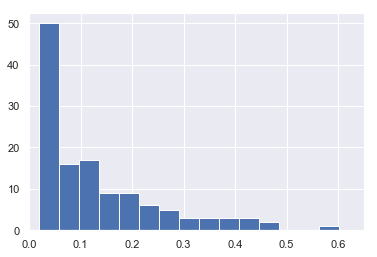

In [58]:
sous_nutri['proportion_sousnutri_2013'] = 10**6*sous_nutri['population_sous-nutrition_2012/14(millions)']/(1000*sous_nutri['Population_2013'])
sous_nutri['proportion_sousnutri_2017'] = 10**6*sous_nutri['population_sous-nutrition_2015/17(millions)']/(1000*sous_nutri['Population_2017'])

tmp1 = sous_nutri[['Pays', 'proportion_sousnutri_2013', 'proportion_sousnutri_2017']].sort_values(by='proportion_sousnutri_2017', ascending=False)
tmp2 = sous_nutri[['Pays', 'proportion_sousnutri_2013', 'proportion_sousnutri_2017']].sort_values(by='proportion_sousnutri_2013', ascending=False)
tmp3 = sous_nutri[['Pays','proportion_sousnutri_2017']]
ax = tmp1.proportion_sousnutri_2017.hist(bins=15)
ax.set_xlim([0,0.65])
plt.show()

seuil = 0.1

pays_sousnutri = tmp1[tmp1.proportion_sousnutri_2017>=0.065].Pays.values 

In [59]:
pays_sousnutri

array(['République centrafricaine', 'Haïti', 'Zimbabwe', 'Zambie',
       'République populaire démocratique de Corée', 'Madagascar',
       'Ouganda', 'Tchad', 'Libéria', 'Congo', 'Rwanda', 'Yémen',
       'République-Unie de Tanzanie', 'Mozambique', 'Afghanistan', 'Iraq',
       'Guinée-Bissau', 'Botswana', 'Malawi', 'Sierra Leone', 'Soudan',
       'Namibie', 'Kenya', 'Angola', 'Timor-Leste', 'Eswatini',
       'Djibouti', 'Éthiopie', 'Burkina Faso', "Côte d'Ivoire",
       'Pakistan', 'Bolivie (État plurinational de)', 'Mongolie',
       'Guinée', 'Cambodge', 'Nicaragua',
       'République démocratique populaire lao', 'Togo', 'Guatemala',
       'Honduras', 'Bangladesh', 'Inde', 'Niger', 'Philippines',
       'Lesotho', 'Jordanie', 'Paraguay',
       'Venezuela (République bolivarienne du)', 'Liban', 'Mauritanie',
       'Nigéria', 'Sri Lanka', 'El Salvador', 'Sénégal', 'Viet Nam',
       'Myanmar', 'Jamaïque', 'République dominicaine', 'Gabon', 'Bénin',
       'Panama', 'Népal', 

In [60]:
export_food=pd.read_csv("export2013.csv" ,engine="python", encoding='utf-8')
export_food_sousnutri = export_food[export_food.Pays.isin(pays_sousnutri)]

export_food_sousnutri.sample(10)

Code Domaine              Domaine  Code Pays         Pays  Code Élément  \
6294           FBS  Bilans Alimentaires        114        Kenya          5911   
5304           FBS  Bilans Alimentaires        100         Inde          5911   
5930           FBS  Bilans Alimentaires        109     Jamaïque          5911   
9073           FBS  Bilans Alimentaires        171  Philippines          5911   
11999          FBS  Bilans Alimentaires        249        Yémen          5911   
7992           FBS  Bilans Alimentaires        149        Népal          5911   
6715           FBS  Bilans Alimentaires        121        Liban          5911   
157            FBS  Bilans Alimentaires          3      Albanie          5911   
5125           FBS  Bilans Alimentaires         95     Honduras          5911   
7648           FBS  Bilans Alimentaires        141     Mongolie          5911   

                       Élément  Code Produit                  Produit  \
6294   Exportations - Quantité          2655                      Vin   
5304   Exportations - Quantité          2560       Coco (Incl Coprah)   
5930   Exportations - Quantité          2586  Huil Plantes Oleif Autr   
9073   Exportations - Quantité          2534             Racines, Nda   
11999  Exportations - Quantité          2547                     Pois   
7992   Exportations - Quantité          2744                    Oeufs   
6715   Exportations - Quantité          2611      Oranges, Mandarines   
157    Exportations - Quantité          2620                   Raisin   
5125   Exportations - Quantité          2630                     Café   
7648   Exportations - Quantité          2620                   Raisin   

       Code Année  Année               Unité  Valeur Symbole  \
6294         2013   2013  Milliers de tonnes       1       S   
5304         2013   2013  Milliers de tonnes     165       S   
5930         2013   2013  Milliers de tonnes       0       S   
9073         2013   2013  Milliers de tonnes       5       S   
11999        2013   2013  Milliers de tonnes       0       S   
7992         2013   2013  Milliers de tonnes       0       S   
6715         2013   2013  Milliers de tonnes      65       S   
157          2013   2013  Milliers de tonnes       0       S   
5125         2013   2013  Milliers de tonnes     255       S   
7648         2013   2013  Milliers de tonnes       0       S   

      Description du Symbole  
6294   Données standardisées  
5304   Données standardisées  
5930   Données standardisées  
9073   Données standardisées  
11999  Données standardisées  
7992   Données standardisées  
6715   Données standardisées  
157    Données standardisées  
5125   Données standardisées  
7648   Données standardisées

In [61]:
top15_exports = export_food_sousnutri.groupby(['Code Produit','Produit'])['Valeur'].sum().reset_index().sort_values(by='Valeur', ascending=False).head(15)['Produit'].values

In [62]:
top15_exports

array(['Manioc', 'Riz (Eq Blanchi)', 'Huile de Palme', 'Sucre Eq Brut',
       'Bananes', 'Légumes, Autres', 'Blé', 'Poissons Pelagiques', 'Maïs',
       'Fruits, Autres', 'Soja', 'Tomates', 'Café', 'Pommes',
       'Lait - Excl Beurre'], dtype=object)

Parmi les données des bilans alimentaires au niveau mondial, sélectionnez les 200 plus grandes importations de ces produits (1 importation = une quantité d'un produit donné importée par un pays donné sur l'année choisie)
Chargeons le fichier des importations mondiales et affichons que les importations concernant les produits des exportations des pays en sous-nutrition.

In [63]:
import2013= pd.read_csv("importation_mondiale_2013.csv",engine="python", encoding='utf-8')
tmp = import2013[import2013['Produit'].isin(top15_exports)].sort_values(by='Valeur', ascending=False)

sumImports = tmp.head(200).groupby(['Produit'])['Valeur'].sum().reset_index()
sumImports

Produit  Valeur
0               Bananes    9663
1                   Blé  149629
2                  Café    2986
3        Fruits, Autres   16726
4        Huile de Palme   30768
5    Lait - Excl Beurre   90464
6       Légumes, Autres   28177
7                Manioc   34655
8                  Maïs  102451
9   Poissons Pelagiques   13445
10               Pommes    8518
11     Riz (Eq Blanchi)   13990
12                 Soja   93455
13        Sucre Eq Brut   34208
14              Tomates    7143

Calculons les deux ratios suivants : 
* Ratio entre la quantité destinés aux "Autres utilisations" (Other uses) et la disponibilité intérieure.
* Ratio entre la quantité destinée à la nourriture animale et la quantité destinée à la nourriture globale.

(ajouter explication sur le fait qu'on prend le top 15 et on télécharge les données correspondants pour ce top 15 sur le fao)

In [64]:
ratio1=pd.read_csv("inter_other.csv")
ratio1=ratio1.pivot_table("Valeur",index=["Produit"],columns=["Élément"]).reset_index()
ratio1["other/dispo_intérieure"]=ratio1["Autres Utilisations"]/ratio1["Disponibilité intérieure"]
ratio1

ratio2=pd.read_csv("man_animal.csv")
ratio2=ratio2.pivot_table("Valeur",index=["Produit"],columns=["Élément"]).reset_index()
ratio2=ratio2.dropna()
ratio2["Animal/totale"]=ratio2["Aliments pour animaux"]/(ratio2["Aliments pour animaux"]+ratio2["Nourriture"])
ratio2

Élément              Produit  Aliments pour animaux  Nourriture  Animal/totale
0                    Bananes                  871.0     85948.0       0.010032
1                        Blé               129669.0    457823.0       0.220716
3             Fruits, Autres                   61.0    185479.0       0.000329
4             Huile de Palme                    0.0     15212.0       0.000000
5         Lait - Excl Beurre                81974.0    629745.0       0.115177
6            Légumes, Autres                49366.0    762131.0       0.060833
7                     Manioc                87058.0    100637.0       0.463827
8                       Maïs               546110.0    125181.0       0.813522
9        Poissons Pelagiques                18817.0     21682.0       0.464629
10                    Pommes                  662.0     70667.0       0.009281
11          Riz (Eq Blanchi)                33596.0    377287.0       0.081765
12                      Soja                17478.0     10649.0       0.621396
13             Sucre Eq Brut                   89.0    143645.0       0.000619
14                   Tomates                 1870.0    144086.0       0.012812

Relevons le top 3 des produits pour chacun des deux ratios :

In [65]:
top3a = ratio1.sort_values(by="other/dispo_intérieure",ascending=False).head(3)
top3b = ratio2.sort_values(by="Animal/totale",ascending=False).head(3)

## Explorons la sous-nutrition de plus près ...

In [66]:
def z(row) : 
    try :
        np.isnan(row)
        return row
    except :
        if row[0]=='<' : 
            return 0
        else :
            return float(row)
pop_nutri_cat=pd.read_csv("pop_nutri_%.csv")
pop_nutri_cat=pop_nutri_cat.dropna()
pop_nutri_cat=pop_nutri_cat.drop(pop_nutri_cat[(pop_nutri_cat["Année"]=="2008-2010")].index)
pop_nutri_cat=pop_nutri_cat.drop(pop_nutri_cat[(pop_nutri_cat["Année"]=="2010-2012")].index)
pop_nutri_cat=pop_nutri_cat.drop(pop_nutri_cat[(pop_nutri_cat["Année"]=="2012-2014")].index)
pop_nutri_cat=pop_nutri_cat.drop(pop_nutri_cat[(pop_nutri_cat["Année"]=="2014-2016")].index)
pop_nutri_cat=pop_nutri_cat[["Zone","Année","Valeur"]]
pop_nutri_cat["en million d'habitant"]=pop_nutri_cat["Valeur"].apply(z)
pop_nutri_cat=pop_nutri_cat[["Zone","Année","en million d'habitant"]]
pop_nutri_cat=pop_nutri_cat.pivot_table("en million d'habitant",index="Année",columns="Zone").reset_index()
pop_nutri_cat

Zone Année  Afrique  Afrique Centrale  Afrique de l'Est  Afrique de l'Ouest  \
0     2009     19.6              28.9              32.3                10.5   
1     2011     18.8              27.1              30.7                10.3   
2     2013     18.3              24.9              30.4                10.4   
3     2015     18.6              24.1              30.5                11.4   
4     2017     20.4              26.1              31.4                15.1   

Zone  Afrique du Nord  Afrique du Sud  Asie Centrale  Asie de l'Est  \
0                 5.2             7.3            7.8           11.8   
1                 5.0             6.9            6.6           10.5   
2                 8.2             7.1            6.0            9.3   
3                 8.0             7.9            5.8            8.5   
4                 8.5             8.4            6.2            8.5   

Zone  Asie de l'Ouest  Asie du Sud  Monde  
0                 9.0         17.3   12.2  
1                 9.4         17.2   11.5  
2                 9.9         16.7   11.0  
3                10.9         15.6   10.6  
4                11.3         14.8   10.9

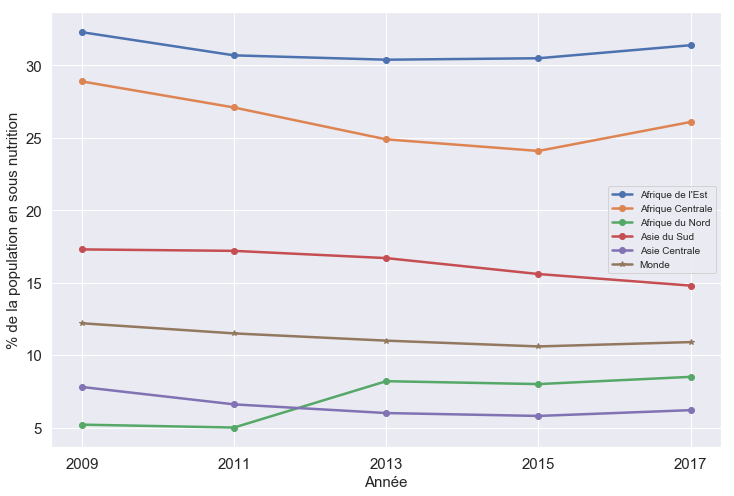

In [67]:
sns.set()

values_x = pop_nutri_cat["Année"].values
values_1 = pop_nutri_cat["Afrique de l'Est"].values
values_2 = pop_nutri_cat["Afrique Centrale"].values
values_3 = pop_nutri_cat["Afrique du Nord"].values
values_4 = pop_nutri_cat["Asie du Sud"].values
values_5 = pop_nutri_cat["Asie Centrale"].values
values_6 = pop_nutri_cat["Monde"].values

plt.figure(figsize=(12,8))

plt.plot(values_x,values_1, marker='o', label="Afrique de l'Est",linewidth=2.5)
plt.plot(values_x,values_2, marker='o', label='Afrique Centrale',linewidth=2.5)
plt.plot(values_x,values_3, marker='o', label='Afrique du Nord',linewidth=2.5)
plt.plot(values_x,values_4, marker='o', label='Asie du Sud',linewidth=2.5)
plt.plot(values_x,values_5, marker='o', label='Asie Centrale',linewidth=2.5)
plt.plot(values_x,values_6, marker='*', label='Monde',linewidth=2.5)
plt.legend()
plt.grid(axis='y', linestyle='-')


plt.xlabel('Année',fontsize=15)
plt.ylabel('% de la population en sous nutrition',fontsize=15)
plt.gca().legend(fontsize = 10, loc = 'best')
plt.gca().yaxis.set_tick_params(labelsize = 15)
plt.gca().xaxis.set_tick_params(labelsize = 15)
plt.show()

**Regardons l'évolution de la sous-nutrition entre 2013 et 2017 pour les pays les plus touchés**

In [68]:
tmp2=tmp2.head(10)
tmp2["evolution sous_nutri"]=100*(tmp2.proportion_sousnutri_2017-tmp2.proportion_sousnutri_2013)/tmp2.proportion_sousnutri_2013
tmp2

Pays  proportion_sousnutri_2013  \
52                                        Haïti                   0.498477   
96                    République centrafricaine                   0.466703   
125                                      Zambie                   0.461948   
126                                    Zimbabwe                   0.445049   
100  République populaire démocratique de Corée                   0.416233   
29                                        Congo                   0.378836   
69                                      Libéria                   0.373283   
113                                       Tchad                   0.373089   
70                                   Madagascar                   0.357125   
86                                      Ouganda                   0.335519   

     proportion_sousnutri_2017  evolution sous_nutri  
52                    0.455322             -8.657275  
96                    0.600977             28.770859  
125                   0.432897             -6.288839  
126                   0.453723              1.948922  
100                   0.431525              3.673888  
29                    0.361165             -4.664558  
69                    0.380396              1.905604  
113                   0.382550              2.535937  
70                    0.418444             17.170304  
86                    0.401279             19.599344

# Question 13 : 
<a id="q13-q14"></a>
Combien de tonnes de céréales pourraient être libérées si les USA diminuaient leur production de produits animaux de 10% ?
***

In [69]:
food_man_ani[food_man_ani.Pays=="États-Unis d'Amérique"]

Élément                   Pays                Produit  Aliments pour animaux  \
171      États-Unis d'Amérique  Cèrèales - Excl Bière               140096.0   

Élément  Nourriture  
171         33809.0

In [70]:
food_man_ani[food_man_ani.Pays=="États-Unis d'Amérique"]
print("Voici en millier de tonnes de céréales que les Etats-Unis pourraient liberer :",140096*0.1)

Voici en millier de tonnes de céréales que les Etats-Unis pourraient liberer : 14009.6


# Question 14 :
### En Thaïlande, quelle proportion de manioc est exportée ? Quelle est la proportion de personnes en sous-nutrition?
***

In [71]:
thai=export_food_sousnutri[export_food_sousnutri.Produit=="Manioc"]
thai=thai[thai.Pays=="Thaïlande"]
thai=thai[["Pays","Produit","Élément","Unité","Valeur"]]
thai

Pays Produit                  Élément               Unité  Valeur
11190  Thaïlande  Manioc  Exportations - Quantité  Milliers de tonnes   25214

**La proportion de manioc exportée par la Thailande en milliers de tonnes est de 25214.**


Chargeons maintenant le fichier concernant la disponibilité alimentaire en kcal/personne/jour en Thailande.

In [72]:
dispo_thai=pd.read_csv("dispo_thai.csv")
dispo_thai["Valeur"].sum()

2785

In [73]:
tmp3[tmp3.Pays=="Thaïlande"]

Pays  proportion_sousnutri_2017
115  Thaïlande                   0.089806

**Si la disponibilité alimentaire etait bien repartie aucun Thailandais ne serait en sous nutrition**. Cependant d'apres la FAO, 9% de la population Thailandaise est en sous-nutrition, ce qui rejoint les résultats précédemment évoqués ...

# Partie B. Base de données
<a id="partie2"></a>
***

Dans les questions 15 à 19, nous allons créer certaines tables, les sauvegarder sous format CSV puis proposer les clés primaires qui leur correspondent.

# Question 15 
<a id="tables"></a>
Une table appelée population, contenant la population de chaque pays pour chaque année comprise entre 2012 et la dernière année disponible à la date où vous aurez consulté le site de la FAO. Elle devra contenir 4 colonnes : pays, code_pays, annee, population.

In [74]:
population12_17=pd.read_csv("popu12-17.csv")
population12_17.loc[population12_17["Unité"] == "1000 personnes", "Valeur"] = 1000 * population12_17.Valeur
population12_17=population12_17.drop(columns=["Code Domaine","Domaine","Code Élément","Élément","Code Produit","Produit","Code année","Unité",
                            "Symbole","Description du Symbole","Note"])
population12_17.columns=["Code Pays","Pays","Année","Population"]
population12_17.head()

Code Pays         Pays  Année  Population
0          2  Afghanistan   2012  30696958.0
1          2  Afghanistan   2013  31731688.0
2          2  Afghanistan   2014  32758020.0
3          2  Afghanistan   2015  33736494.0
4          2  Afghanistan   2016  34656032.0

In [75]:
population12_17.to_csv("population_12_17.csv", index = False)


# Question 16
Une table appelée dispo_alim contenant pour chaque pays, pour chaque produit, et pour chaque année comprise entre 2012 et la dernière année disponible, les informations suivantes:
la nature du produit (deux valeurs possibles : “animal” ou “végétal”)
disponibilité alimentaire en tonnes
disponibilité alimentaire en Kcal/personne/jour
disponibilité alimentaire de protéines en g/personne/jour
disponibilité alimentaire de matières grasses en g/personne/jour
Elle devra contenir ces colonnes : pays, code_pays, année, produit, code_produit, origin, dispo_alim_tonnes, dispo_alim_kcal_p_j, dispo_prot, dispo_mat_gr .

In [76]:
population12=pd.read_csv("pop12.csv")
population12
population12.loc[population12["Unité"] == "1000 personnes", "Valeur"] = 1000 * population12.Valeur
population12=population12.drop(columns=["Code Domaine","Domaine","Code Pays","Code Élément","Élément","Code Produit","Code Année"
                          ,"Symbole","Description du Symbole","Unité"])
population12.head()

Pays     Produit  Année    Valeur
0     Afghanistan  Population   2012  29825000
1  Afrique du Sud  Population   2012  52386000
2         Albanie  Population   2012   3162000
3         Algérie  Population   2012  38482000
4       Allemagne  Population   2012  82800000

In [77]:
dispo_alim12=pd.read_csv("q16_ani_vege.csv")
dispo_alim12.loc[dispo_alim12["Élément"]=="Disponibilité alimentaire en quantité (kg/personne/an)","Valeur"]=population12.Valeur*dispo_alim12.Valeur*0.001
dispo_alim12.loc[dispo_alim12["Unité"]=="kg","Unité"]="Tonnes"
dispo_alim12.loc[dispo_alim12["Élément"]=="Disponibilité alimentaire en quantité (kg/personne/an)","Élément"]="Disponibilité alimentaire annuelle en tonnes"
dispo_alim12.head()

Code Domaine              Domaine  Code Pays         Pays  Code Élément  \
0          FBS  Bilans Alimentaires          2  Afghanistan           645   
1          FBS  Bilans Alimentaires          2  Afghanistan           664   
2          FBS  Bilans Alimentaires          2  Afghanistan           674   
3          FBS  Bilans Alimentaires          2  Afghanistan           684   
4          FBS  Bilans Alimentaires          2  Afghanistan           645   

                                             Élément  Code Produit  \
0       Disponibilité alimentaire annuelle en tonnes          2511   
1     Disponibilité alimentaire (Kcal/personne/jour)          2511   
2  Disponibilité de protéines en quantité (g/pers...          2511   
3  Disponibilité de matière grasse en quantité (g...          2511   
4       Disponibilité alimentaire annuelle en tonnes          2805   

            Produit  Code Année  Année               Unité      Valeur  \
0               Blé        2012   2012              Tonnes  4809877.75   
1               Blé        2012   2012  Kcal/personne/jour     1378.00   
2               Blé        2012   2012     g/personne/jour       37.16   
3               Blé        2012   2012     g/personne/jour        4.64   
4  Riz (Eq Blanchi)        2012   2012              Tonnes  1181556.00   

  Symbole Description du Symbole  
0      Fc        Donnée calculée  
1      Fc        Donnée calculée  
2      Fc        Donnée calculée  
3      Fc        Donnée calculée  
4      Fc        Donnée calculée

In [78]:
dispo_alim13=pd.read_csv("q16_13_ani_vege.csv")
dispo_alim13.loc[dispo_alim13["Élément"]=="Disponibilité alimentaire en quantité (kg/personne/an)","Valeur"]=totale_finale_q3_Alimentaire["population totale 2013"]*dispo_alim13.Valeur*0.001
dispo_alim13.loc[dispo_alim13["Unité"]=="kg","Unité"]="Tonnes"
dispo_alim13.loc[dispo_alim13["Élément"]=="Disponibilité alimentaire en quantité (kg/personne/an)","Élément"]="Disponibilité alimentaire annuelle en tonnes"
dispo_alim13.head()

Code Domaine              Domaine  Code Pays         Pays  Code Élément  \
0          FBS  Bilans Alimentaires          2  Afghanistan           645   
1          FBS  Bilans Alimentaires          2  Afghanistan           664   
2          FBS  Bilans Alimentaires          2  Afghanistan           674   
3          FBS  Bilans Alimentaires          2  Afghanistan           684   
4          FBS  Bilans Alimentaires          2  Afghanistan           645   

                                             Élément  Code Produit  \
0       Disponibilité alimentaire annuelle en tonnes          2511   
1     Disponibilité alimentaire (Kcal/personne/jour)          2511   
2  Disponibilité de protéines en quantité (g/pers...          2511   
3  Disponibilité de matière grasse en quantité (g...          2511   
4       Disponibilité alimentaire annuelle en tonnes          2805   

            Produit  Code Année  Année               Unité      Valeur  \
0               Blé        2013   2013              Tonnes  4895346.96   
1               Blé        2013   2013  Kcal/personne/jour     1369.00   
2               Blé        2013   2013     g/personne/jour       36.91   
3               Blé        2013   2013     g/personne/jour        4.69   
4  Riz (Eq Blanchi)        2013   2013              Tonnes   422228.64   

  Symbole Description du Symbole  
0      Fc        Donnée calculée  
1      Fc        Donnée calculée  
2      Fc        Donnée calculée  
3      Fc        Donnée calculée  
4      Fc        Donnée calculée

In [4]:
prod_animaux=pd.read_csv("produits_animaux.csv")
prod_animaux=prod_animaux["Produit"].value_counts().index
prod_animaux

Index(['Poissons Eau Douce', 'Viande d'Ovins/Caprins', 'Beurre, Ghee',
       'Viande de Bovins', 'Lait - Excl Beurre', 'Viande de Volailles',
       'Viande, Autre', 'Oeufs', 'Abats Comestible', 'Graisses Animales Crue',
       'Perciform', 'Poissons Pelagiques', 'Mollusques, Autres',
       'Poissons Marins, Autres', 'Crustacés', 'Cephalopodes',
       'Viande de Suides', 'Huiles de Poissons', 'Huiles de Foie de Poisso',
       'Animaux Aquatiques Autre', 'Viande de Anim Aquatiq'],
      dtype='object')

In [80]:
dispo_alim=pd.concat([dispo_alim12,dispo_alim13])
dispo_alim=dispo_alim.drop(columns=["Code Domaine","Domaine","Code Élément","Code Année"
                          ,"Symbole","Description du Symbole"])
dispo_alim=dispo_alim.pivot_table("Valeur",index=["Pays","Code Pays","Année","Produit","Code Produit"],columns=["Élément"]).reset_index()
dispo_alim["Nature du Produit"]="Végétal"
dispo_alim.loc[dispo_alim["Produit"].isin(prod_animaux),"Nature du Produit"]="Animal"
dispo_alim=dispo_alim.fillna(0)
dispo_alim.head()

Élément         Pays  Code Pays  Année                Produit  Code Produit  \
0        Afghanistan          2   2012       Abats Comestible          2736   
1        Afghanistan          2   2012        Agrumes, Autres          2614   
2        Afghanistan          2   2012  Aliments pour enfants          2680   
3        Afghanistan          2   2012                 Ananas          2618   
4        Afghanistan          2   2012                Bananes          2615   

Élément  Disponibilité alimentaire (Kcal/personne/jour)  \
0                                                   6.0   
1                                                   0.0   
2                                                   1.0   
3                                                   0.0   
4                                                   3.0   

Élément  Disponibilité alimentaire annuelle en tonnes  \
0                                             2433.34   
1                                              324.88   
2                                                0.00   
3                                                0.00   
4                                              540.80   

Élément  Disponibilité de matière grasse en quantité (g/personne/jour)  \
0                                                     0.22               
1                                                     0.00               
2                                                     0.01               
3                                                     0.00               
4                                                     0.01               

Élément  Disponibilité de protéines en quantité (g/personne/jour)  \
0                                                     0.81          
1                                                     0.01          
2                                                     0.03          
3                                                     0.00          
4                                                     0.03          

Élément Nature du Produit  
0                  Animal  
1                 Végétal  
2                 Végétal  
3                 Végétal  
4                 Végétal

In [81]:
dispo_alim.to_csv("dispo_alim_1254.csv", index = False)

# Question 17 : Proposez une clé primaire pertinente pour cette table.

Une table appelée equilibre_prod contenant pour chaque pays, pour chaque produit, et pour chaque année comprise entre 2012 et la dernière année disponible, les quantités suivantes :
disponibilité intérieure
aliments pour animaux
semences
pertes
transformés
nourriture
autres utilisations
Elle devra contenir ces colonnes : pays, code_pays, année, produit, code_produit, dispo_int, alim_ani, semences, pertes, transfo, nourriture, autres_utilisations.

In [5]:
equilibre_prod=pd.read_csv("equi_prod_12_13.csv")
equilibre_prod=equilibre_prod.pivot_table("Valeur",index=["Pays","Code Pays","Année","Produit","Code Produit"],columns=["Élément"]).reset_index()
equilibre_prod["Nature du Produit"]="Végétal"
equilibre_prod.loc[equilibre_prod["Produit"].isin(prod_animaux),"Nature du Produit"]="Animal"
equilibre_prod=equilibre_prod.fillna(0)
equilibre_prod.head()

Élément         Pays  Code Pays  Année                Produit  Code Produit  \
0        Afghanistan          2   2012       Abats Comestible          2736   
1        Afghanistan          2   2012        Agrumes, Autres          2614   
2        Afghanistan          2   2012  Aliments pour enfants          2680   
3        Afghanistan          2   2012                 Ananas          2618   
4        Afghanistan          2   2012                Bananes          2615   

Élément  Aliments pour animaux  Autres Utilisations  Disponibilité intérieure  \
0                          0.0                  0.0                      54.0   
1                          0.0                  0.0                      19.0   
2                          0.0                  0.0                       2.0   
3                          0.0                  0.0                       0.0   
4                          0.0                  0.0                      48.0   

Élément  Nourriture  Pertes  Semences  Traitement Nature du Produit  
0              54.0     0.0       0.0         0.0            Animal  
1              18.0     1.0       0.0         0.0           Végétal  
2               2.0     0.0       0.0         0.0           Végétal  
3               0.0     0.0       0.0         0.0           Végétal  
4              48.0     0.0       0.0         0.0           Végétal

In [83]:
equilibre_prod.to_csv("equilibre_prod_1214.csv", index = False)

# Question 18 : Vous vous en doutez... proposez encore une fois une clé primaire pertinente pour cette table !

Une table appelée sous_nutrition, contenant le nombre de personnes en sous-alimentation pour chaque pays et pour chaque année comprise entre 2012 et la dernière année disponible. Elle devra contenir 4 colonnes : pays, code_pays, année, nb_personnes.


In [84]:
sous_nutrition_18=pd.read_csv("sous_nutrition_18.csv")
sous_nutrition_18.head()

Code Domaine                             Domaine  Code zone         Zone  \
0           FS  Données de la sécurité alimentaire          2  Afghanistan   
1           FS  Données de la sécurité alimentaire          2  Afghanistan   
2           FS  Données de la sécurité alimentaire          2  Afghanistan   
3           FS  Données de la sécurité alimentaire          2  Afghanistan   
4           FS  Données de la sécurité alimentaire          2  Afghanistan   

   Code Élément Élément  Code Produit  \
0          6132  Valeur        210011   
1          6132  Valeur        210011   
2          6132  Valeur        210011   
3          6132  Valeur        210011   
4          6132  Valeur        210011   

                                             Produit  Code année      Année  \
0  Nombre de personnes sous-alimentées (millions)...    20112013  2011-2013   
1  Nombre de personnes sous-alimentées (millions)...    20122014  2012-2014   
2  Nombre de personnes sous-alimentées (millions)...    20132015  2013-2015   
3  Nombre de personnes sous-alimentées (millions)...    20142016  2014-2016   
4  Nombre de personnes sous-alimentées (millions)...    20152017  2015-2017   

      Unité Valeur Symbole Description du Symbole  
0  millions    7.2       F         Estimation FAO  
1  millions    8.1       F         Estimation FAO  
2  millions      9       F         Estimation FAO  
3  millions    9.9       F         Estimation FAO  
4  millions   10.5       F         Estimation FAO

In [85]:
sous_nutrition_18=pd.read_csv("sous_nutrition_18.csv")
def f(row) : 
    try :
        np.isnan(row)
        return row
    except :
        if row[0]=='<' :
            if row == '<0.1' : 
                return np.nan
            else : return float(row[1:])
        else :
            return float(row)
sous_nutrition_18["nb_personnes"]=sous_nutrition_18["Valeur"].apply(f)
hulk=sous_nutrition_18["nb_personnes"]>0

sous_nutrition_18=sous_nutrition_18[hulk]
sous_nutrition_18=sous_nutrition_18[['Zone','Code zone','Année','nb_personnes']]
sous_nutrition_18=sous_nutrition_18.pivot_table("nb_personnes",index=["Zone","Code zone","Année"]).reset_index()
sous_nutrition_18.columns=["Pays","Code pays","Année","nb_personnes"]
sous_nutrition_18.sample(10)

Pays  Code pays      Année  \
391                                     Nigéria        159  2012-2014   
524                                   Sri Lanka         38  2015-2017   
492  République populaire démocratique de Corée        116  2013-2015   
516                                      Soudan        276  2012-2014   
217                                   Guatemala         89  2013-2015   
309                                Kirghizistan        113  2015-2017   
372                                     Myanmar         28  2013-2015   
362                                    Mongolie        141  2013-2015   
621                                    Équateur         58  2011-2013   
123                                       Chili         40  2014-2016   

     nb_personnes  
391          12.2  
524           2.3  
492          10.6  
516           9.3  
217           2.6  
309           0.4  
372           6.0  
362           0.5  
621           1.3  
123           0.6

In [86]:
sous_nutrition_18.to_csv("sous_nutrition_18542.csv", index = False)

## Question 19
Pour cette question, on utilise le **logiciel "Db Browser for SQlite** pour créer ces tables dans la base de données.

<img src="sous_nutrition_sql.png">
<img src="population_sql.png">
<img src="equilibre_prod_sql.png">
<img src="dispo_alim_sql.png">

## Implémentation et execution des requêtes avec sqlite3
<a id="requetes"></a>

In [87]:
import os
import sqlite3
fname_db = 'Project_3_sql.db'
if os.path.isfile(fname_db): os.remove(fname_db) 
conn = sqlite3.connect(fname_db)
cursor = conn.cursor()

In [88]:
dispo_alim_sql=pd.read_csv("dispo_alim_sql.csv")

In [89]:
dispo_alim_sql=pd.read_csv("dispo_alim_sql.csv")
dispo_alim_sql.to_sql('dispo_alim_sql', conn, if_exists='append', index=False)
equilibre_prod_sql=pd.read_csv("equilibre_prod_sql.csv")
equilibre_prod_sql.to_sql('equilibre_prod_sql', conn, if_exists='append', index=False)
sous_nutrition_sql=pd.read_csv("sous_nutrition_sql.csv")
sous_nutrition_sql.to_sql("sous_nutrition_sql",conn, if_exists='append',index=False)
population_sql=pd.read_csv("population_sql.csv")
population_sql.to_sql("population_sql",conn, if_exists='append',index=False)

In [90]:
cursor.execute("""CREATE TABLE IF NOT EXISTS "dispo_alim_sql" (
	"Pays"	TEXT,
	"CodePays"	INTEGER,
	"Année"	INTEGER,
	"Produit"	TEXT,
	"CodeProduit"	INTEGER,
	"Disponibilitéalimentairekcal"	REAL,
	"Disponibilitéalimentaireannuelleentonnes"	REAL,
	"Disponibilitédematièregrasseenquantité(g/personne/jour)"	REAL,
	"Disponibilitédeprotéinesenquantité"	REAL,
	"NatureduProduit"	TEXT,
	PRIMARY KEY("Pays","Année","Produit")
);
""")
conn.commit()

In [91]:
cursor.execute("""CREATE TABLE IF NOT EXISTS "equilibre_prod_sql" (
	"Pays"	TEXT,
	"CodePays"	INTEGER,
	"Année"	INTEGER,
	"Produit"	TEXT,
	"CodeProduit"	INTEGER,
	"Alimentspouranimaux"	REAL,
	"AutresUtilisations"	REAL,
	"Disponibilitéintérieure"	REAL,
	"Nourriture"	REAL,
	"Pertes_millier_tonnes"	REAL,
	"Semences"	REAL,
	"Traitement"	REAL,
	"NatureduProduit"	TEXT,
	PRIMARY KEY("Pays","Année","Produit")
);
""")
conn.commit()

In [92]:
cursor.execute("""CREATE TABLE IF NOT EXISTS "population_sql" (
	"CodePays"	INTEGER,
	"Pays"	TEXT,
	"Année"	INTEGER,
	"Population"	REAL,
	PRIMARY KEY("Pays","Année")
);
""")
conn.commit()

In [93]:
cursor.execute("""CREATE TABLE IF NOT EXISTS "sous_nutrition_sql" (
	"Pays"	TEXT,
	"Codepays"	INTEGER,
	"Année"	TEXT,
	"nb_personnes"	REAL,
	PRIMARY KEY("Pays","Année")
);
""")
conn.commit()

**Les 10 pays ayant le plus haut ratio disponibilité alimentaire/habitant en termes de kcal par habitant.**

In [94]:
requête_1_1 = pd.read_sql_query("""SELECT dispo_alim_sql.Pays,
sum(dispo_alim_sql.Disponibilitéalimentairekcal*365) AS ratio_disponibilité_alimentaire_habitant_kcal,
dispo_alim_sql.Année
FROM dispo_alim_sql
WHERE dispo_alim_sql.Année=2013
group by dispo_alim_sql.Pays
ORDER BY ratio_disponibilité_alimentaire_habitant_kcal DESC
LIMIT 10
""", conn)
requête_1_1

Pays  ratio_disponibilité_alimentaire_habitant_kcal  Année
0               Autriche                                      1376050.0   2013
1               Belgique                                      1364005.0   2013
2                Turquie                                      1353420.0   2013
3  États-Unis d'Amérique                                      1343930.0   2013
4                 Israël                                      1317650.0   2013
5                Irlande                                      1314730.0   2013
6                 Italie                                      1305970.0   2013
7             Luxembourg                                      1292100.0   2013
8                 Égypte                                      1284070.0   2013
9              Allemagne                                      1278595.0   2013

**Les 10 pays ayant le plus haut ratio disponibilité alimentaire/habitant en termes de protéines (en kg) par habitant.**

In [95]:
requête_1_2 = pd.read_sql_query("""SELECT
	dispo_alim_sql.Pays, 
	sum(dispo_alim_sql.Disponibilitédeprotéinesenquantité*0.001*365) as total_dispo_prot,
	dispo_alim_sql.Année
FROM dispo_alim_sql
WHERE dispo_alim_sql.Année=2013
GROUP BY
	dispo_alim_sql.Pays
ORDER BY total_dispo_prot DESC
LIMIT 10;
""", conn)
requête_1_2

Pays  total_dispo_prot  Année
0                   Islande          48.56690   2013
1  Chine - RAS de Hong-Kong          47.11055   2013
2                    Israël          46.72000   2013
3                  Lituanie          45.39140   2013
4                  Maldives          44.64680   2013
5                  Finlande          42.90940   2013
6                Luxembourg          41.47860   2013
7                Monténégro          40.84350   2013
8                  Pays-Bas          40.68290   2013
9                   Albanie          40.65005   2013

**Pour chaque année disponible, les 10 pays ayant le plus faible ratio disponibilité alimentaire/habitant en termes de protéines (en kg) par habitant. Le nombre de lignes de la table renvoyée sera donc égal à 10 fois le nombre d'années disponibles.**

In [96]:
requête_2=pd.read_sql_query("""select * from 
(
SELECT 
	 dispo_alim_sql.Pays ,
	 dispo_alim_sql.Année,
	 sum(dispo_alim_sql.Disponibilitédeprotéinesenquantité*0.001*365) as total_dispo_prot
FROM dispo_alim_sql
WHERE dispo_alim_sql.Année= 2012
GROUP BY dispo_alim_sql.Pays
ORDER BY total_dispo_prot ASC
LIMIT 10
)
UNION ALL 

select * from 
(
SELECT 
	 dispo_alim_sql.Pays ,
	 dispo_alim_sql.Année,
	 sum(dispo_alim_sql.Disponibilitédeprotéinesenquantité*0.001*365) as total_dispo_prot
FROM dispo_alim_sql
WHERE dispo_alim_sql.Année= 2013
GROUP BY dispo_alim_sql.Pays
ORDER BY total_dispo_prot ASC
LIMIT 10
)
""", conn)
requête_2

Pays  Année  total_dispo_prot
0                     Libéria   2012          13.89555
1               Guinée-Bissau   2012          15.98700
2                  Mozambique   2012          17.12580
3                       Haïti   2012          17.23165
4                  Madagascar   2012          17.24625
5                       Congo   2012          18.06385
6                    Zimbabwe   2012          18.51280
7   République centrafricaine   2012          19.27200
8        Sao Tomé-et-Principe   2012          19.35960
9                     Ouganda   2012          19.59685
10                    Libéria   2013          13.74590
11              Guinée-Bissau   2013          16.07825
12                 Mozambique   2013          16.67320
13  République centrafricaine   2013          16.80460
14                 Madagascar   2013          17.04185
15                      Haïti   2013          17.41050
16                   Zimbabwe   2013          17.63680
17                      Congo   2013          18.76465
18                    Ouganda   2013          19.21360
19       Sao Tomé-et-Principe   2013          19.38150

**La quantité totale (en kg) de produits perdus par pays et par année. La table renvoyée contiendra donc une ligne par couple (pays, année).**

In [97]:
requête_3=pd.read_sql_query("""SELECT
	equilibre_prod_sql.Pays, 
	sum(equilibre_prod_sql.Pertes_millier_tonnes*1000*1000) as total_perte,
	equilibre_prod_sql.Année
FROM equilibre_prod_sql
GROUP BY
	equilibre_prod_sql.Pays , equilibre_prod_sql.Année
ORDER BY 
equilibre_prod_sql.Pays , equilibre_prod_sql.Année
""", conn)
requête_3.head(10)

Pays   total_perte  Année
0     Afghanistan  1.113000e+09   2012
1     Afghanistan  1.135000e+09   2013
2  Afrique du Sud  1.994000e+09   2012
3  Afrique du Sud  2.193000e+09   2013
4         Albanie  2.710000e+08   2012
5         Albanie  2.760000e+08   2013
6         Algérie  2.984000e+09   2012
7         Algérie  3.753000e+09   2013
8       Allemagne  3.734000e+09   2012
9       Allemagne  3.781000e+09   2013

**Les 10 pays pour lesquels la proportion de personnes sous-alimentées est la plus forte.**

In [99]:
requête_4=pd.read_sql_query("""SELECT population_sous_nutri.Pays, population_sous_nutri / total_population as ratio_sousnutri FROM
(
  SELECT sous_nutrition_sql.nb_personnes*1000000 AS population_sous_nutri, sous_nutrition_sql.Pays
  FROM sous_nutrition_sql
  WHERE sous_nutrition_sql.Année="2015-2017"
) population_sous_nutri

INNER JOIN 
(
  SELECT Population AS total_population, Pays
  FROM population_sql 
  WHERE Année=2017
) total_population
ON population_sous_nutri.Pays = total_population.Pays

ORDER BY ratio_sousnutri DESC
LIMIT 10
""", conn)
requête_4

Pays  ratio_sousnutri
0                   République centrafricaine         0.600977
1                                       Haïti         0.455322
2                                    Zimbabwe         0.453723
3                                      Zambie         0.432897
4  République populaire démocratique de Corée         0.431525
5                                  Madagascar         0.418444
6                                     Ouganda         0.401279
7                                       Tchad         0.382550
8                                     Libéria         0.380396
9                                       Congo         0.361165

**Les 10 produits pour lesquels le ratio Autres utilisations/Disponibilité intérieure est le plus élevé.**

In [102]:
requête_5=pd.read_sql_query("""select Produit, AVG(tmp2.moy1_ratio_autre_inter) as avg_ratio_autre_inter from
(
select Produit, Année, AVG(tmp.ratio_autre_inter) as moy1_ratio_autre_inter from 
(
SELECT
	equilibre_prod_sql.Produit,
	equilibre_prod_sql.AutresUtilisations/equilibre_prod_sql.Disponibilitéintérieure AS ratio_autre_inter,
	equilibre_prod_sql.Année
FROM equilibre_prod_sql
)tmp
GROUP BY tmp.Année, tmp.Produit
)tmp2
group by tmp2.Produit
ORDER BY avg_ratio_autre_inter DESC
LIMIT 10
""", conn)
requête_5

Produit  avg_ratio_autre_inter
0    Alcool, non Comestible               0.965665
1        Plantes Aquatiques               0.920989
2            Huile de Palme               0.652546
3        Huile de Palmistes               0.538933
4   Huil Plantes Oleif Autr               0.513084
5   Huile de Colza&Moutarde               0.478783
6        Huiles de Poissons               0.383340
7             Huile de Coco               0.347363
8    Graisses Animales Crue               0.303812
9  Huiles de Foie de Poisso               0.251111

In [ ]:
cursor.close()
conn.close()

## QUESTION 20
   ## Voici quelques autres utilisations de certains des produits detenant le ratio Autres utilisations/Disponibilité intérieure est le plus élevé
 
 **Définition Fao concernant les autres utiisations :"les quantités utilisées durant la période de référence à la fabrication de produits non alimentaires, comme ce peut être le cas d'une huile utilisée à la fabrication de savon."**


**L'huile de palme** est aussi utilisé massivement pour **oléochimie (cosmétique)**.


**L'alcool non comestible** est utilisé comme **combustible**.

**Traitement des peaux de chamois (huile de poisson)**

## Sources
***
<a id="sources"></a>

https://www.capital.fr/polemik/faut-il-interdire-l-utilisation-de-l-huile-de-palme-raffinerie-total-1223419

https://www.fne.asso.fr/actualites/10-produits-inattendus-qui-contiennent-de-lhuile-de-palme-et-comment-les-rep%C3%A9rer

http://www.fao.org/3/x9892f/x9892f03.htm

http://www.fao.org/faostat/fr/#data

https://donnees.banquemondiale.org/indicateur/SN.ITK.DEFC.ZS?view=map

https://www.lemonde.fr/planete/article/2019/04/02/sept-chiffres-sur-la-malnutrition-et-l-insecurite-alimentaire-dans-le-monde_5444581_3244.html

http://www.fao.org/state-of-food-security-nutrition/fr/

http://www.fao.org/french/newsroom/news/2002/9703-fr.html

https://zero-gachis.com/fr/quelques-chiffres

https://www.lepoint.fr/monde/les-chiffres-de-la-faim-dans-le-monde-sont-a-jeter-a-la-poubelle-20-11-2016-2084341_24.php

https://www.cerin.org

https://www.lanutrition.fr/

## Logiciels utilisés
<img src="logo.png">
<img src="four_logos.png">
<img src="58482f85cef1014c0b5e4a84.png">